In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# VISUALIZATION

<AxesSubplot:>

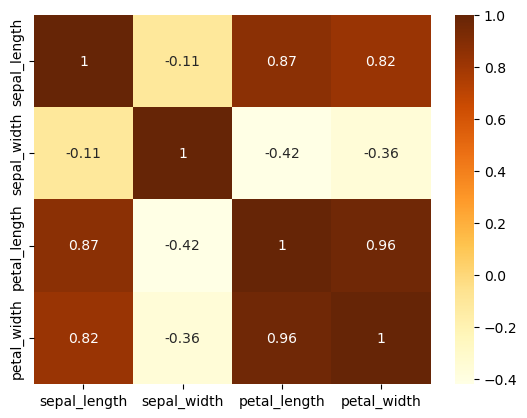

In [7]:
#checking for correlation
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')

Observation

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

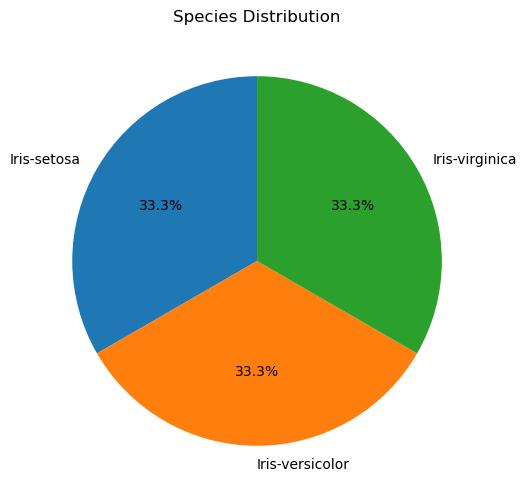

In [8]:
# Calculate the species counts
species_counts = df['species'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')

# Display the pie chart
plt.show()

The above pie chart shows the three species has equal distribution

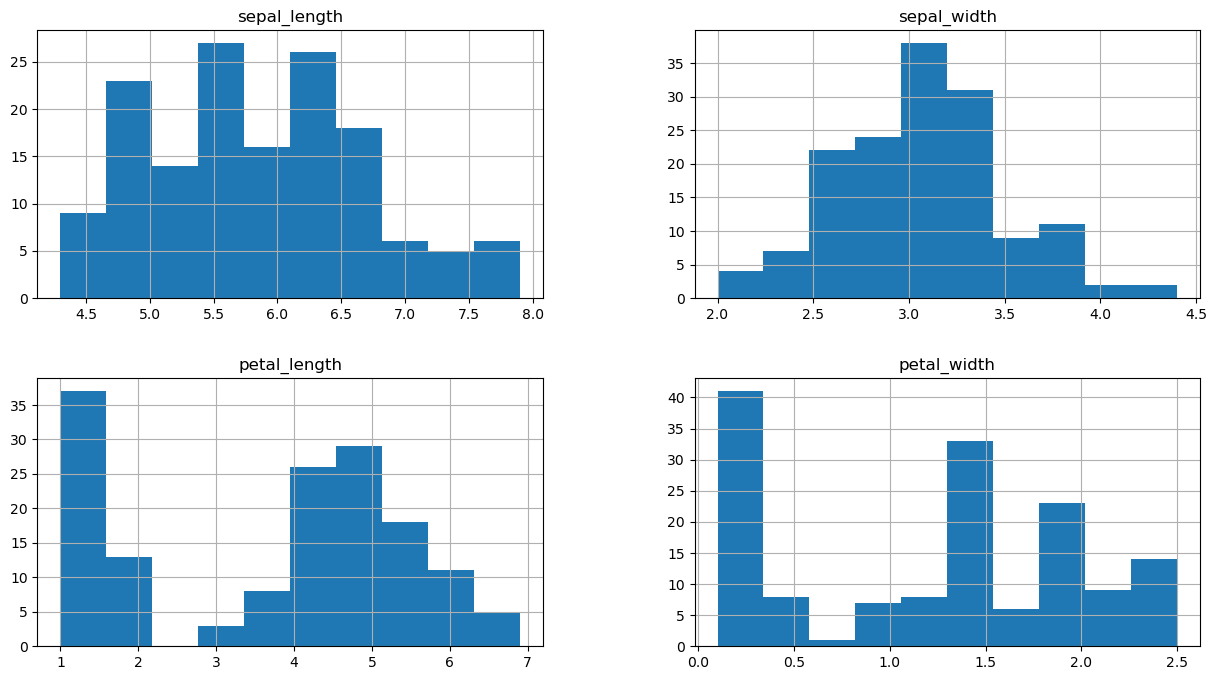

In [9]:
#distribution of columns
df.hist(figsize=(15,8));

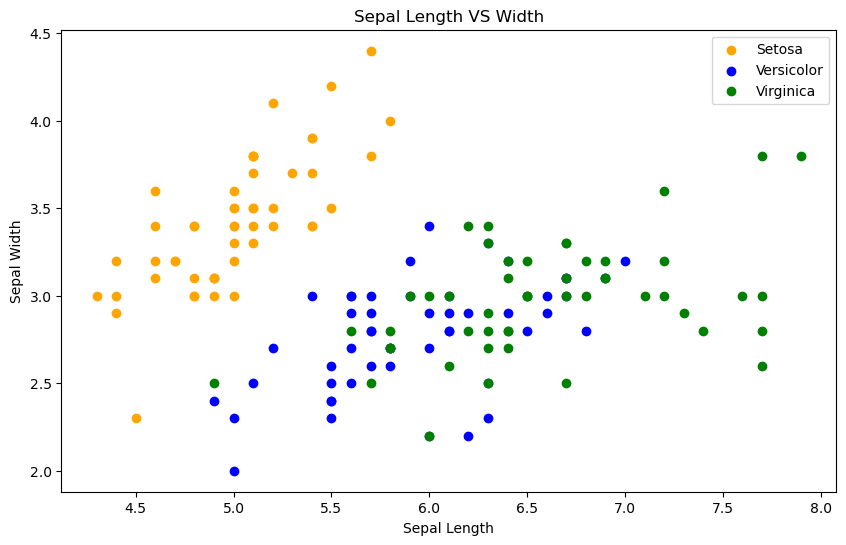

In [10]:
# Create a figure and axis
fig, ax = plt.subplots()

# Filter and print Setosa
setosa = df[df.species == 'Iris-setosa']
ax.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='orange', label='Setosa')

# Filter and print Versicolor
versicolor = df[df.species == 'Iris-versicolor']
ax.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='blue', label='Versicolor')

# Filter and print Virginica
virginica = df[df.species == 'Iris-virginica']
ax.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='green', label='Virginica')

# Set labels and title
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Sepal Length VS Width")

# Set the size of the figure
fig.set_size_inches(10, 6)

# Show the legend
ax.legend()

# Show the plot
plt.show()


The above chart illustrates the correlation between sepal length and width. 
Now, let's examine the relationship between petal length and width.

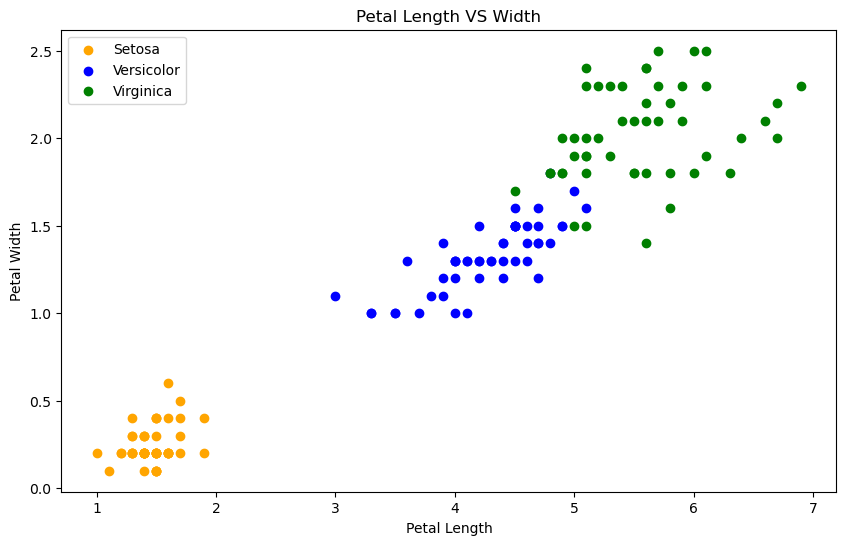

In [11]:

# Create a figure and axis
fig, ax = plt.subplots()

# Filter and print Setosa
setosa = df[df.species == 'Iris-setosa']
ax.scatter(x=setosa['petal_length'], y=setosa['petal_width'], color='orange', label='Setosa')

# Filter and print Versicolor
versicolor = df[df.species == 'Iris-versicolor']
ax.scatter(x=versicolor['petal_length'], y=versicolor['petal_width'], color='blue', label='Versicolor')

# Filter and print Virginica
virginica = df[df.species == 'Iris-virginica']
ax.scatter(x=virginica['petal_length'], y=virginica['petal_width'], color='green', label='Virginica')

# Set labels and title
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length VS Width")

# Set the size of the figure
fig.set_size_inches(10, 6)

# Show the legend
ax.legend()

# Show the plot
plt.show()


It is evident that the Petal Features exhibit a more distinct separation between species in comparison to the Sepal features. 
This suggests that Petal characteristics may offer improved and more precise predictive capabilities than Sepal characteristics. 
We will further investigate this later.

# showing how the length and width vary according to the species below

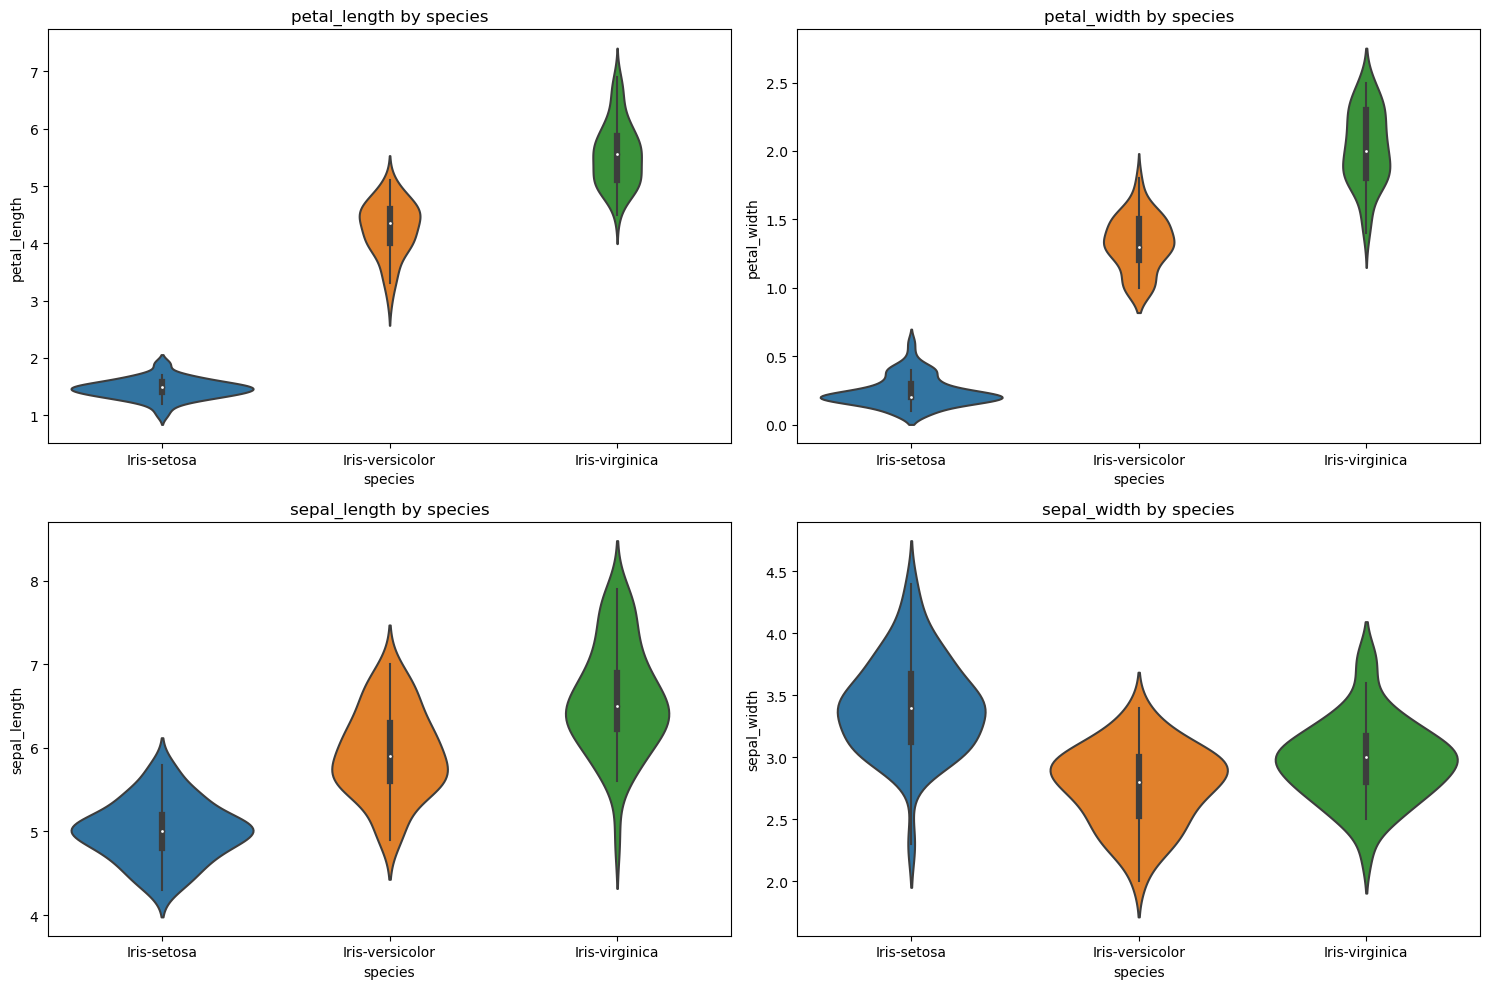

In [12]:
# List of features to create violin plots for
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the features and create violin plots
for i, feature in enumerate(features):
    sns.violinplot(x='species', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"{feature} by species")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The violin plot visually represents the distribution of length and width within each species. 
The narrower sections indicate lower data density, while the wider sections represent higher data density.

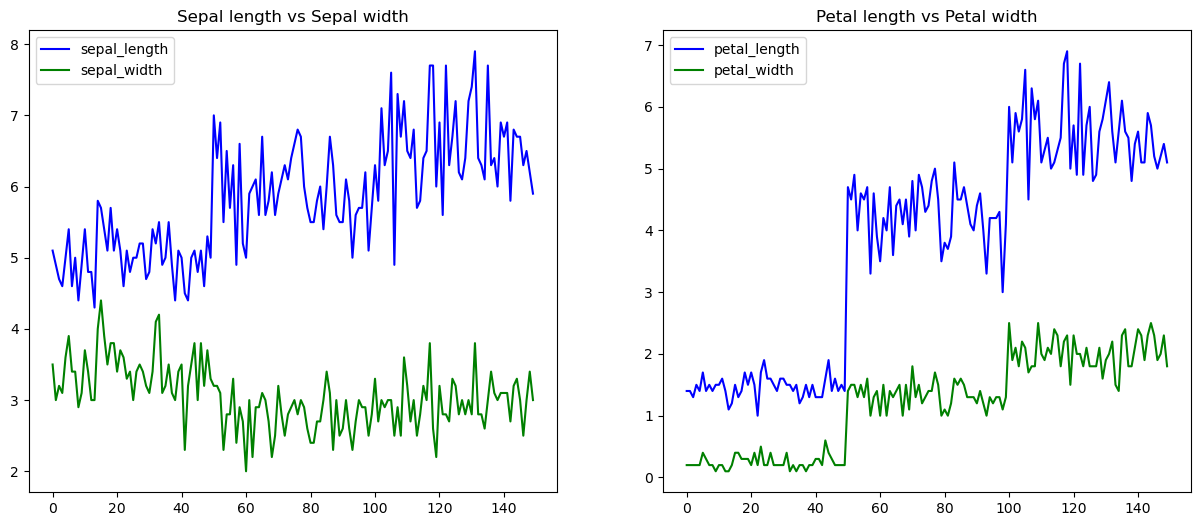

In [13]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Sepal features on the first subplot
axes[0].plot(df['sepal_length'], label='sepal_length', color='blue')
axes[0].plot(df['sepal_width'], label='sepal_width', color='green')
axes[0].set_title('Sepal length vs Sepal width')
axes[0].legend()

# Plot Petal features on the second subplot
axes[1].plot(df['petal_length'], label='petal_length', color='blue')
axes[1].plot(df['petal_width'], label='petal_width', color='green')
axes[1].set_title('Petal length vs Petal width')
axes[1].legend()

# Show the plots
plt.show()


The pair plot and box plots provide clear evidence that the three Iris flower species exhibit distinct characteristics in sepal length, sepal width, petal length, and petal width. Specifically, Setosa tends to have shorter sepal and petal lengths but wider sepals. In contrast, Virginica stands out with longer sepals and petals compared to the other two species. Versicolor falls in between Setosa and Virginica in terms of these measurements.

These visualizations have proven invaluable for gaining insights into the relationships and disparities among Iris species and their features. Consequently, they enhance our ability to classify and analyze these flowers based on their measurements.







# MODELLING

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
#convert species int sclassification using label encoder
df['species'] = LabelEncoder().fit_transform(df['species'])
df['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [16]:
#set random seed
np.random.seed(42)

In [17]:
# Separate the target variable from the features
x = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## using decision tree

In [18]:

# Initialize the GradientBoostingClassifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) 
print("Model Accuracy of DecisionTreeClassifier is:", accuracy)

Model Accuracy of DecisionTreeClassifier is: 1.0


## using RandomForestClassifier

In [19]:
#using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier model
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred1 = rf.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred) 
print("Model Accuracy of RandomForestClassifier is:", accuracy)


Model Accuracy of RandomForestClassifier is: 1.0


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

## using logistic regression

In [21]:
#using logistic regression

# Increase max_iter to a higher value
logistic_model = LogisticRegression(max_iter=1000)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train_scaled, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(x_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, logistic_predictions) * 100

# Print the accuracy score
print("Accuracy Score of LogisticRegression is:", accuracy)



Accuracy Score of LogisticRegression is: 100.0


## using the KNN model

In [22]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, knn_predictions) * 100

# Print the accuracy score
print("Accuracy Score of knn is:", accuracy)

Accuracy Score of knn is: 100.0


C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## using SVC

In [23]:
from sklearn.svm import SVC

# Create the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(x_test)


# Calculate the accuracy score
accuracy = accuracy_score(y_test, svm_predictions) * 100

# Print the accuracy score
print("Accuracy Score of SVC is:", accuracy)


Accuracy Score of SVC is: 100.0


## Calculate precision, recall, and F1-score (macro average)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score (macro average)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1-Score (Macro):", f1)



Precision (Macro): 1.0
Recall (Macro): 1.0
F1-Score (Macro): 1.0


the classification model demonstrates excellent performance, with high accuracy, effective positive instance capture, and a balanced approach between precision and recall. These results validate the model's quality and reliability for the given multiclass classification task.

## Perform cross-validation

In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [1.         0.9047619  0.9047619  0.95238095 0.95238095]


Cross-Validation Scores Summary:

Cross-validation is a technique to evaluate the performance of a machine learning model across different subsets of the dataset.

Your model was tested using 5-fold cross-validation, meaning the dataset was divided into 5 parts, and the model was trained and evaluated 5 times, with a different part held out as a test set each time.

The cross-validation results show how well your model performs on each fold:

The accuracy on Fold 1 and Fold 2 is around 85.71%, indicating consistent performance on these subsets.
Fold 3 achieved perfect accuracy (100.00%), suggesting strong performance on that subset.
Fold 4 demonstrated an accuracy of approximately 95.24%, indicating good predictive ability.
Fold 5 also had an accuracy of approximately 85.71%, aligning with the performance on Folds 1 and 2.
These results provide insights into how your model generalizes to different portions of the data and its consistency in making accurate predictions.

The average of these scores can be used as an overall estimate of your model's performance, while the variation among the folds helps assess its reliability.

Cross-validation is a valuable technique for understanding your model's strengths and potential areas for improvement, ensuring its readiness for real-world applications.

## making predictions with new data

In [34]:


print(rf.predict([[3.0, 3.7, 1.7, 0.2]]))
print(svm_model.predict([[3.9, 4.4, 4.3, 2.0]]))

[0]
[1]


C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Saving the model

In [28]:
import pickle

In [30]:
pickle_out = open('randomforest.pkl', 'w+b')


In [31]:
pickle.dump(rf, pickle_out)

In [32]:
pickle_out.close()